In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import os

# Define the directory where models will be saved
models_dir = r"C:\Users\menah\Downloads\Heart_Disease_Project\data"

model_path = os.path.join(models_dir, 'heart_disease_encoded_scaled_test.csv')
X_test= pd.read_csv(model_path)

model_path = os.path.join(models_dir, 'heart_disease_encoded_scaled_train.csv')
X_train=pd.read_csv(model_path) 

model_path = os.path.join(models_dir, 'heart_disease_target_test.csv')
y_test=pd.read_csv(model_path) 

model_path = os.path.join(models_dir, 'heart_disease_target_train.csv')
y_train=pd.read_csv(model_path)

### Dimensionality Reduction - PCA (Principal Component Analysis)

In [21]:
print (len(y_train==0))
print (len(y_train==1))
print (len(y_test==0))
print (len(y_test==1))

236
236
60
60


In [22]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.89476023e-01, 8.99126055e-02, 7.09830558e-02, 6.75969463e-02,
       6.35879431e-02, 5.77373765e-02, 5.09922874e-02, 4.79970631e-02,
       4.56849670e-02, 4.38787714e-02, 3.72515284e-02, 3.67686540e-02,
       3.54345440e-02, 3.25622563e-02, 2.78175364e-02, 2.67234176e-02,
       2.46027651e-02, 2.11762334e-02, 1.59014679e-02, 1.39145578e-02,
       5.23483349e-33, 5.15348085e-33, 4.63800710e-33, 3.46378636e-33,
       1.26675065e-33, 1.02802696e-33])

In [23]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18947602, 0.27938863, 0.35037168, 0.41796863, 0.48155657,
       0.53929395, 0.59028624, 0.6382833 , 0.68396827, 0.72784704,
       0.76509857, 0.80186722, 0.83730177, 0.86986402, 0.89768156,
       0.92440498, 0.94900774, 0.97018397, 0.98608544, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [24]:
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(pca.explained_variance_ratio_)

In [25]:
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")

Optimal number of components to retain 95% variance: 18


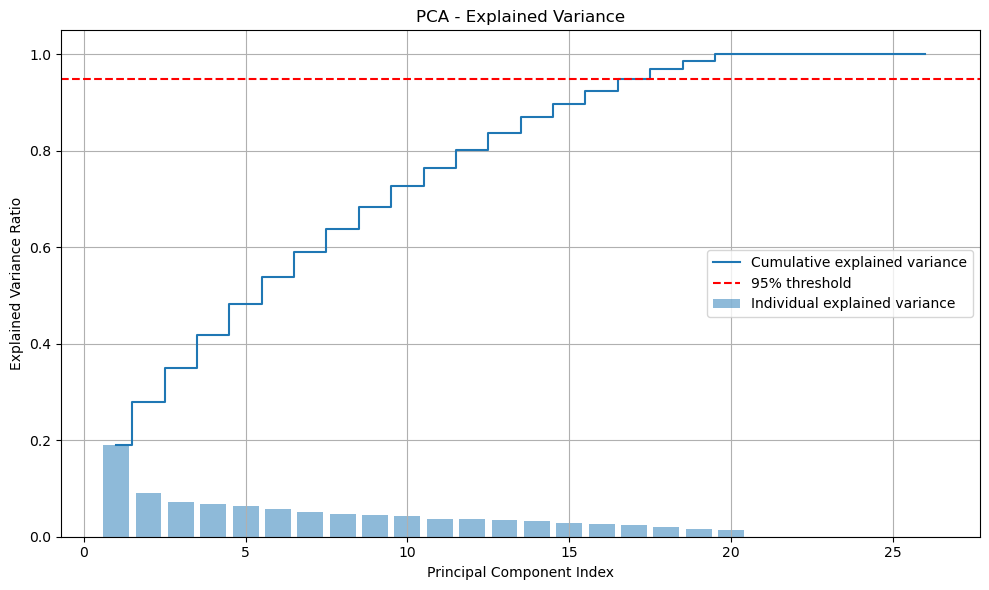

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5,
        align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')

plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
pca_final = PCA(n_components=optimal_components)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

# Convert to DataFrame for easy handling
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(optimal_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(optimal_components)])

print("PCA-transformed training dataset preview:")
print(X_train_pca_df.head())

PCA-transformed training dataset preview:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.825035  1.669660  1.121556 -1.727818 -0.150157 -1.034999  0.557524   
1  2.960137  0.167295 -0.148397 -1.238385 -0.596907 -0.172634 -0.811618   
2  1.618365 -1.134227  0.271291  1.975154  0.245704  0.668864 -0.493642   
3 -3.752781  1.669094  0.562300 -1.039783 -1.032992  1.290281  0.738586   
4  1.536814  2.309114 -2.296906 -0.710747  3.207258 -1.402548 -0.411540   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  1.005330  1.241383 -0.023862 -0.321918 -0.654013 -1.209685 -1.014214   
1 -0.904132 -1.074163  0.193433 -0.424309 -0.277883 -0.008671  0.013944   
2 -0.512493 -0.195216 -0.185138 -0.726274 -0.504978 -1.097023 -0.278318   
3 -0.993916 -0.144196 -0.700888  0.671823 -0.326225  0.198813  0.999352   
4  0.001840 -1.147286 -1.293007  2.381593 -0.421941  0.702051  0.184414   

       PC15      PC16      PC17      PC18  
0  0.480135 

In [28]:

import os

# Define the directory where models will be saved
models_dir = r"C:\Users\menah\Downloads\Heart_Disease_Project\data"
os.makedirs(models_dir, exist_ok=True)  # Create directory if it doesn't exist




import os

# Define the directory where models will be saved
models_dir = r"C:\Users\menah\Downloads\Heart_Disease_Project\data"
os.makedirs(models_dir, exist_ok=True)  # Create directory if it doesn't exist


model_path = os.path.join(models_dir,'X_train_pca.csv')
X_train_pca_df.to_csv(model_path, index=False)


model_path = os.path.join(models_dir,'X_test_pca.csv')
X_test_pca_df.to_csv(model_path, index=False)